# <font color=red><center><b>BBM409 : Introduction to Machine Learning Lab - Assignment 3</b></center></font>

<center><img src="https://upload.wikimedia.org/wikipedia/tr/2/28/Hacettepe_%C3%9Cniversitesi_Logosu.svg" />

## <font color=black><center>Berra Nur SARI - 21727671 <br> Melih SUNMAN - 21827809</center></font>

# <font color=red>Abstract</font>

In this project, we wrote an algorithm that distinguishes spam and ham emails in a given dataset using the Naive Bayes algorithm. We used the variables unigram-bigram and stopword to analyze the words. In this way, we have seen the effects on the measurement more clearly. We made some determinations on some words in the data set. This gave us an idea of how well the concept works on data

# <font color=red><center>Part 1: Understanding the data</center></font>

1- First keyword is "stayatlochness". Its reapeted 3 times at spam mails but not seen at ham mails.
Obviously the word is misspelled. Misspelled words are comman at spam mails.
This allows us to detect spam emails more easily.

2- Second keywords is "enron". It's most repeated word in ham mails,
repeated 13382 times at ham mails and dont exist at spam mails.
Words like this that are repeated frequently in a single class give us a high posterior probability.
High posterior probability minimizes classification errors

3- Third keywords is "viagra". It's most repeated word in spam mails,
repeated 174 times at spam mails and dont exist at ham mails. Similar to the second word, this word will help us find spam mails.

When the examples given are examined, we see that the Naive Bayes algorithm is feasible in this data set.


# <font color=red><center>Part 2: Implementing Naive Bayes</center></font>

**Naive Bayes** algorithm makes classification based on **Bayes' Theorem**. In simple terms, a Naive Bayes classifier assumes that the existence of a particular property in a class has nothing to do with the existence of any other property. Besides simplicity, Naive Bayes is known to outperform even extremely complex classification methods. Bayes' theorem provides a way of calculating the **posterior probability of P(c|x) from P(c), P(x), and P(x|c)**.

Importing needed libraries

In [1]:
import pandas as pd
import math
import numpy as np  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score

Created a dataframe holding our data with the pandas library

In [2]:
df = pd.read_csv('emails.csv')

The names of the columns in the dataframe changed to Label and Message.

In [3]:
df = df.rename(columns={'text': 'Message'})
df = df.rename(columns={'spam': 'Label'})

Data shuffled. The data were divided into two as train set and test set. 80% of the data was used for the train set. 20% of the data was used for the test set.

In [4]:
# Randomize the dataset
data_randomized = df.sample(frac=1, random_state=1)

# Calculate index for split
splitter_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:splitter_index].reset_index(drop=True)
test_set = data_randomized[splitter_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4582, 2)
(1146, 2)


### <font color=orange>UNIGRAM IMPLEMENTATION</font>

In the Unigram section, each CountVectorizer and the number of times each unique word occurs in the mail samples are found. Words are evaluated with the Naive Bayes algorithm. By finding the posterior probability of each word, the spam-raw status of the mail samples is estimated. Logarithmic sum was made in order not to get 0 error in the ratio calculation and also laplace smoothing was applied so that words not encountered in the test region do not give zero odds.

Using CountVectorizer for creating unigram word list and frequance table :

In [6]:
vectorizer_unigram = CountVectorizer(analyzer='word')
word_vector = vectorizer_unigram.fit_transform(training_set["Message"])
word_list = vectorizer_unigram.get_feature_names()

Identification of spam and raw samples :

In [7]:
spam_messages = training_set[training_set['Label'] == 1]
ham_messages = training_set[training_set['Label'] == 0]

Finding rates of spam and raw samples

In [8]:
p_spam = len(spam_messages) / len(training_set)
p_ham = len(ham_messages) / len(training_set)

Creation of vectors of spam and raw samples

In [11]:
spam_word_vector = vectorizer_unigram.transform(spam_messages["Message"])
spam_word_list = vectorizer_unigram.get_feature_names()

ham_word_vector = vectorizer_unigram.transform(ham_messages["Message"])
ham_word_list = vectorizer_unigram.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [12]:
# N_Vocabulary
n_vocabulary = len(word_list)

Laplace Smoothing is used to solve the numerical underflow problem in our algorithm. Laplace smoothing is a smoothing technique that handles the problem of zero probability in Naive Bayes. Using Laplace smoothing, we can represent P(w’|positive) as

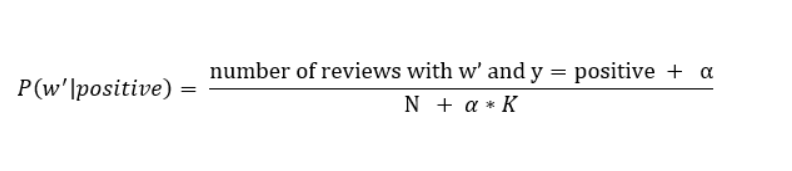

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [13]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and raw was calculated and recorded.

In [14]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [15]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [16]:
def classify_test_set(messages):
  test_vector = vectorizer_unigram.transform(messages['Message'])

  preds = []
  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [17]:
pred_uniform = classify_test_set(test_set)

In [18]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_uniform))
print("Precision score : " ,precision_score(test_set["Label"] , pred_uniform))
print("Recall score : " ,recall_score(test_set["Label"] , pred_uniform))
print("F1 score : " ,f1_score(test_set["Label"] , pred_uniform))

Accuracy score :  0.9921465968586387
Precision score :  0.9850187265917603
Recall score :  0.9813432835820896
F1 score :  0.9831775700934579


### <font color=orange>BIGRAM IMPLEMENTATION</font>

In the bigram part, the words are evaluated in pairs. The number of times each pair has passed in the mail samples is found and the posterior probability is calculated. Thus, the Naive Bayes algorithm makes the prediction over binary word groups. Logarithmic sum was made in order not to get 0 error in the ratio calculation and also laplace smoothing was applied so that words not encountered in the test region do not give zero odds.

In [20]:
vectorizer_bigram = CountVectorizer(analyzer='word',ngram_range=(2, 2))
word_vector = vectorizer_bigram.fit_transform(training_set["Message"])
word_list = vectorizer_bigram.get_feature_names()

In [21]:
spam_word_vector = vectorizer_bigram.transform(spam_messages["Message"])
spam_word_list = vectorizer_bigram.get_feature_names()

ham_word_vector = vectorizer_bigram.transform(ham_messages["Message"])
ham_word_list = vectorizer_bigram.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [22]:
# N_Vocabulary
n_vocabulary = len(word_list)

Laplace Smoothing is used to solve the numerical underflow problem in our algorithm. Laplace smoothing is a smoothing technique that handles the problem of zero probability in Naive Bayes. Using Laplace smoothing, we can represent P(w’|positive) as

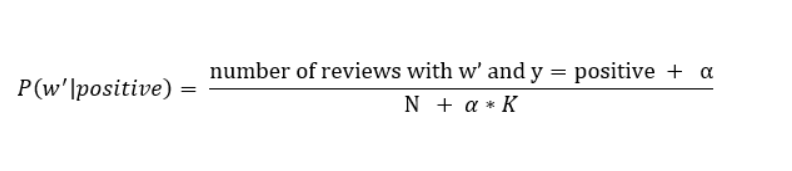

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [23]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and raw was calculated and recorded.

In [24]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [25]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [26]:
def classify_test_set_for_bigram(messages):
  p_spam_given_message = math.log2(p_spam)
  p_ham_given_message = math.log2(p_ham)
  
  test_vector = vectorizer_bigram.transform(messages['Message'])
  preds = []

  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [27]:
pred_bigram = classify_test_set_for_bigram(test_set)

In [28]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_bigram))
print("Precision score : " ,precision_score(test_set["Label"] , pred_bigram))
print("Recall score : " ,recall_score(test_set["Label"] , pred_bigram))
print("F1 score : " ,f1_score(test_set["Label"] , pred_bigram))

Accuracy score :  0.9834205933682374
Precision score :  0.9920948616600791
Recall score :  0.9365671641791045
F1 score :  0.963531669865643


### <font color=orange>CO-IMPLEMENTATION OF UNIGRAM AND BIGRAM</font>

In the CO-IMPLEMENTATION part, each unique single word and binary phrase was included in the calculation. This allowed the dataset to be evaluated with a much larger word list. Logarithmic sum was made in order not to get 0 error in the ratio calculation and also laplace smoothing was applied so that words not encountered in the test region do not give zero odds.

In [30]:
vectorizer_both = CountVectorizer(analyzer='word',ngram_range=(1, 2))
word_vector = vectorizer_both.fit_transform(training_set["Message"])
word_list = vectorizer_both.get_feature_names()

In [31]:
spam_word_vector = vectorizer_both.transform(spam_messages["Message"])
spam_word_list = vectorizer_both.get_feature_names()

ham_word_vector = vectorizer_both.transform(ham_messages["Message"])
ham_word_list = vectorizer_both.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [32]:
# N_Vocabulary
n_vocabulary = len(word_list)

Laplace Smoothing is used to solve the numerical underflow problem in our algorithm. Laplace smoothing is a smoothing technique that handles the problem of zero probability in Naive Bayes. Using Laplace smoothing, we can represent P(w’|positive) as

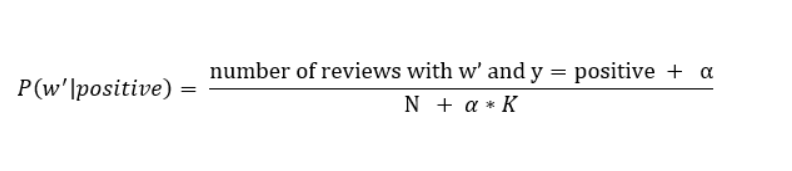

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [33]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and ham was calculated and recorded.

In [34]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [35]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [36]:
def classify_test_set_for_both(messages):
  p_spam_given_message = math.log2(p_spam)
  p_ham_given_message = math.log2(p_ham)
  
  test_vector = vectorizer_both.transform(messages['Message'])
  preds = []

  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [37]:
pred_both = classify_test_set_for_both(test_set)

In [38]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_both))
print("Precision score : " ,precision_score(test_set["Label"] , pred_both))
print("Recall score : " ,recall_score(test_set["Label"] , pred_both))
print("F1 score : " ,f1_score(test_set["Label"] , pred_both))

Accuracy score :  0.987783595113438
Precision score :  0.99609375
Recall score :  0.9514925373134329
F1 score :  0.9732824427480916


# <font color=red><center>Part 3</center></font>

In the 3rd section, instead of using every word in the data set for spam and raw prediction, words determined by TF-IDF were used. Then, StopWords, which are frequently repeated in English and have no computational value, were removed from the determined words and their effect was measured.

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

### <font color=orange>(a) Analyzing effect of the words on prediction</font>

Since the frequency of the words is focused in the Naive Bayes algorithm, the presence vs absence of the words affects the calculations. Frequent repetitions of the word add spam or raw status to that word. The absence of the word was handled with Laplace smoothing.

##### The 10 words whose presence most strongly predicts that the mail is ham.

In [40]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
vectorizer_spam = CountVectorizer(analyzer='word')
wordCount = vectorizer_spam.fit_transform(spam_messages["Message"])
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_spam_important_words = np.squeeze(np.asarray(newTfIdf2))
df_spam = pd.DataFrame(array_for_spam_important_words, index=vectorizer_spam.get_feature_names(), columns=["TFIDF"])
df_spam = df_spam.sort_values('TFIDF', ascending=False)
print (df_spam.head(15))

             TFIDF
to       87.208242
the      80.540990
you      71.319668
and      68.001613
your     66.359839
of       57.661163
in       44.060374
for      42.078493
is       41.715150
this     37.663261
we       33.546893
it       30.245974
our      29.955628
be       27.992381
subject  27.367603


##### The 10 words whose presence most strongly predicts that the mail is spam

In [41]:
tfIdfTransformer2 = TfidfTransformer(use_idf=True)
vectorizer_ham = CountVectorizer(analyzer='word')
wordCount = vectorizer_ham.fit_transform(ham_messages["Message"])
newTfIdf = tfIdfTransformer2.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_ham_important_words = np.squeeze(np.asarray(newTfIdf2))
df_ham = pd.DataFrame(array_for_ham_important_words, index=vectorizer_ham.get_feature_names(), columns=["TFIDF"])
df_ham = df_ham.sort_values('TFIDF', ascending=False)
print (df_ham.head(15))

              TFIDF
the      349.048120
to       303.482363
and      200.595724
ect      179.796522
you      175.024996
of       173.515777
enron    152.343950
for      147.090396
in       146.317674
vince    128.286375
on       122.651278
is       111.756341
subject  100.992001
we        98.834946
be        96.896433


In [81]:
tfIdfTransformer3 = TfidfTransformer(use_idf=True)
vectorizer_spam = CountVectorizer(analyzer='word', ngram_range=(2, 2))
wordCount = vectorizer_spam.fit_transform(spam_messages["Message"])
newTfIdf = tfIdfTransformer3.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_spam_important_words = np.squeeze(np.asarray(newTfIdf2))
df_spam_bigram = pd.DataFrame(array_for_spam_important_words, index=vectorizer_spam.get_feature_names(), columns=["TFIDF"])
df_spam_bigram = df_spam.sort_values('TFIDF', ascending=False)
print (df_spam.head(15))

                    TFIDF
submit website  10.000429
http www         8.459852
search engines   7.686744
jul 2005         6.720751
best regards     6.653843
19 jul           6.565647
subject save     6.149054
save money       6.081626
80 adobe         5.988634
adobe premiere   5.930870
software need    5.899344
mx 2004          5.804471
web sites        4.774678
mailing list     4.661486
new life         4.596885


In [82]:
tfIdfTransformer4 = TfidfTransformer(use_idf=True)
vectorizer_ham = CountVectorizer(analyzer='word',ngram_range=(2, 2))
wordCount = vectorizer_ham.fit_transform(ham_messages["Message"])
newTfIdf = tfIdfTransformer4.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_ham_important_words = np.squeeze(np.asarray(newTfIdf2))
df_ham_bigram = pd.DataFrame(array_for_ham_important_words, index=vectorizer_ham.get_feature_names(), columns=["TFIDF"])
df_ham_bigram = df_ham.sort_values('TFIDF', ascending=False)
print (df_ham.head(15))

                          TFIDF
hou ect               77.139277
ect ect               75.818793
vince kaminski        60.735491
enron com             42.424424
cc subject            33.959383
kaminski hou          32.581352
let know              31.595590
ect cc                30.261546
shirley crenshaw      27.424212
enron enron           27.417797
research group        21.345604
kaminski enron        21.302093
lon ect               20.869028
enron communications  20.823528
corp enron            20.025000


### <font color=orange>(b) Stopwords</font>

The words which has high frequency after removing the **stopwords**

In [44]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
vectorizer_spam = CountVectorizer(stop_words = 'english' , analyzer='word')
wordCount = vectorizer_spam.fit_transform(spam_messages["Message"])
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_spam_important_words = np.squeeze(np.asarray(newTfIdf2))
df_spam = pd.DataFrame(array_for_spam_important_words, index=vectorizer_spam.get_feature_names(), columns=["TFIDF"])
df_spam = df_spam.sort_values('TFIDF', ascending=False)
print (df_spam.head(15))

              TFIDF
subject   30.091987
website   25.298590
com       24.842083
software  24.837429
business  24.821799
email     21.299732
click     20.958498
adobe     20.240824
money     19.354716
company   18.576105
just      18.303004
http      17.607515
need      16.948170
free      16.920990
online    16.784071


In [45]:
tfIdfTransformer2 = TfidfTransformer(use_idf=True)
vectorizer_ham = CountVectorizer(stop_words = 'english' , analyzer='word')
wordCount = vectorizer_ham.fit_transform(ham_messages["Message"])
newTfIdf = tfIdfTransformer2.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_ham_important_words = np.squeeze(np.asarray(newTfIdf2))
df_ham = pd.DataFrame(array_for_ham_important_words, index=vectorizer_ham.get_feature_names(), columns=["TFIDF"])
df_ham = df_ham.sort_values('TFIDF', ascending=False)
print (df_ham.head(15))

               TFIDF
ect       190.336342
enron     164.000249
vince     138.511721
subject   108.609888
hou        95.100577
2000       84.861151
kaminski   84.567964
com        79.059961
research   63.462030
pm         61.736420
2001       61.237857
cc         61.078205
thanks     59.807706
shirley    54.047652
group      53.667856


In [46]:
tfIdfTransformer3 = TfidfTransformer(use_idf=True)
vectorizer_spam = CountVectorizer(stop_words = 'english',analyzer='word', ngram_range=(2, 2))
wordCount = vectorizer_spam.fit_transform(spam_messages["Message"])
newTfIdf = tfIdfTransformer3.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_spam_important_words = np.squeeze(np.asarray(newTfIdf2))
df_spam = pd.DataFrame(array_for_spam_important_words, index=vectorizer_spam.get_feature_names(), columns=["TFIDF"])
df_spam = df_spam.sort_values('TFIDF', ascending=False)
print (df_spam.head(15))

                    TFIDF
submit website  10.000429
http www         8.459852
search engines   7.686744
jul 2005         6.720751
best regards     6.653843
19 jul           6.565647
subject save     6.149054
save money       6.081626
80 adobe         5.988634
adobe premiere   5.930870
software need    5.899344
mx 2004          5.804471
web sites        4.774678
mailing list     4.661486
new life         4.596885


In [47]:
tfIdfTransformer4 = TfidfTransformer(use_idf=True)
vectorizer_ham = CountVectorizer(stop_words = 'english',analyzer='word',ngram_range=(2, 2))
wordCount = vectorizer_ham.fit_transform(ham_messages["Message"])
newTfIdf = tfIdfTransformer4.fit_transform(wordCount)
newTfIdf2 = np.sum(newTfIdf,axis=0)
array_for_ham_important_words = np.squeeze(np.asarray(newTfIdf2))
df_ham = pd.DataFrame(array_for_ham_important_words, index=vectorizer_ham.get_feature_names(), columns=["TFIDF"])
df_ham = df_ham.sort_values('TFIDF', ascending=False)
print (df_ham.head(15))

                          TFIDF
hou ect               77.139277
ect ect               75.818793
vince kaminski        60.735491
enron com             42.424424
cc subject            33.959383
kaminski hou          32.581352
let know              31.595590
ect cc                30.261546
shirley crenshaw      27.424212
enron enron           27.417797
research group        21.345604
kaminski enron        21.302093
lon ect               20.869028
enron communications  20.823528
corp enron            20.025000


### <font color=orange>(c) Analyzing effect of the stopwords</font>


We applied the Naive Bayes application (unigram, bigram and co-implementation) in the 2nd chapter by removing stopwords and showed the effect of stopwords on the result.

#### <font color=green>Unigram Implementation With StopWords</font>

In [49]:
vectorizer_unigram_sw = CountVectorizer(stop_words='english',analyzer='word')
word_vector = vectorizer_unigram_sw.fit_transform(training_set["Message"])
word_list = vectorizer_unigram_sw.get_feature_names()

In [50]:
spam_word_vector = vectorizer_unigram_sw.transform(spam_messages["Message"])
spam_word_list = vectorizer_unigram_sw.get_feature_names()

ham_word_vector = vectorizer_unigram_sw.transform(ham_messages["Message"])
ham_word_list = vectorizer_unigram_sw.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [51]:
# N_Vocabulary
n_vocabulary = len(word_list)

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [52]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and ham was calculated and recorded.

In [53]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [54]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [55]:
def classify_test_set_sw(messages):
  p_spam_given_message = math.log2(p_spam)
  p_ham_given_message = math.log2(p_ham)

  test_vector = vectorizer_unigram_sw.transform(messages['Message'])

  preds = []
  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [56]:
pred_unigram_sw = classify_test_set_sw(test_set)

In [57]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_unigram_sw))
print("Precision score : " ,precision_score(test_set["Label"] , pred_unigram_sw))
print("Recall score : " ,recall_score(test_set["Label"] , pred_unigram_sw))
print("F1 score : " ,f1_score(test_set["Label"] , pred_unigram_sw))

Accuracy score :  0.993891797556719
Precision score :  0.9924528301886792
Recall score :  0.9813432835820896
F1 score :  0.9868667917448405


In [58]:
stop_words='english'

#### <font color=green>Bigram Implementation With StopWords</font>

In [59]:
vectorizer_bigram_sw = CountVectorizer(stop_words='english', analyzer='word',ngram_range=(2, 2))
word_vector = vectorizer_bigram_sw.fit_transform(training_set["Message"])
word_list = vectorizer_bigram_sw.get_feature_names()

In [60]:
spam_word_vector = vectorizer_bigram_sw.transform(spam_messages["Message"])
spam_word_list = vectorizer_bigram_sw.get_feature_names()

ham_word_vector = vectorizer_bigram_sw.transform(ham_messages["Message"])
ham_word_list = vectorizer_bigram_sw.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [61]:
# N_Vocabulary
n_vocabulary = len(word_list)

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [62]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and ham was calculated and recorded.

In [63]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [64]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [65]:
def classify_test_set_for_bigram_sw(messages):
  p_spam_given_message = math.log2(p_spam)
  p_ham_given_message = math.log2(p_ham)
  
  test_vector = vectorizer_bigram_sw.transform(messages['Message'])
  preds = []

  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [66]:
pred_bigram_sw = classify_test_set_for_bigram_sw(test_set)

In [67]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_bigram_sw))
print("Precision score : " ,precision_score(test_set["Label"] , pred_bigram_sw))
print("Recall score : " ,recall_score(test_set["Label"] , pred_bigram_sw))
print("F1 score : " ,f1_score(test_set["Label"] , pred_bigram_sw))

Accuracy score :  0.9886561954624782
Precision score :  0.9885057471264368
Recall score :  0.9626865671641791
F1 score :  0.9754253308128543


In [68]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_bigram))
print("Precision score : " ,precision_score(test_set["Label"] , pred_bigram))
print("Recall score : " ,recall_score(test_set["Label"] , pred_bigram))
print("F1 score : " ,f1_score(test_set["Label"] , pred_bigram))

Accuracy score :  0.9834205933682374
Precision score :  0.9920948616600791
Recall score :  0.9365671641791045
F1 score :  0.963531669865643


#### <font color=green>Co-Implementation With StopWords</font>

In [69]:
vectorizer_both_sw = CountVectorizer(stop_words='english', analyzer='word',ngram_range=(1, 2))
word_vector = vectorizer_both_sw.fit_transform(training_set["Message"])
word_list = vectorizer_both_sw.get_feature_names()

In [71]:
spam_word_vector = vectorizer_both_sw.transform(spam_messages["Message"])
spam_word_list = vectorizer_both_sw.get_feature_names()

ham_word_vector = vectorizer_both_sw.transform(ham_messages["Message"])
ham_word_list = vectorizer_both_sw.get_feature_names()

n_spam = spam_word_vector.sum()
n_ham = ham_word_vector.sum()

In [72]:
# N_Vocabulary
n_vocabulary = len(word_list)

Alpha value selected as 1. <br>
N = number of spam or number of ham <br>
K = n_vocabulary, number of all unique words

In [73]:
# Laplace smoothing
alpha = 1
divided_value_for_spam = n_spam + alpha*n_vocabulary
divided_value_for_ham = n_ham + alpha*n_vocabulary

For all unique words, the probability of the word being spammed and ham was calculated and recorded.

In [74]:
sum_array_for_spam = np.sum(spam_word_vector,axis=0)
sum_array_for_spam = np.add(sum_array_for_spam,alpha)
sum_array_for_spam = np.log2(np.divide(sum_array_for_spam,divided_value_for_spam))

sum_array_for_ham = np.sum(ham_word_vector,axis=0)
sum_array_for_ham = np.add(sum_array_for_ham,alpha)
sum_array_for_ham = np.log2(np.divide(sum_array_for_ham,divided_value_for_ham))

In [75]:
array_for_spam = np.squeeze(np.asarray(sum_array_for_spam))
array_for_ham = np.squeeze(np.asarray(sum_array_for_ham))

In [76]:
def classify_test_set_for_both_sw(messages):
  p_spam_given_message = math.log2(p_spam)
  p_ham_given_message = math.log2(p_ham)
  
  test_vector = vectorizer_both_sw.transform(messages['Message'])
  preds = []

  for i in test_vector:
    p_spam_given_message = math.log2(p_spam)
    p_ham_given_message = math.log2(p_ham)

    sam = np.sum(array_for_spam[i.tocoo().col])
    p_spam_given_message += sam 

    ham = np.sum(array_for_ham[i.tocoo().col])
    p_ham_given_message += ham

    if p_ham_given_message > p_spam_given_message:
      preds.append(0)
    else:
      preds.append(1)
  
  return preds

In [77]:
pred_both_sw = classify_test_set_for_both_sw(test_set)

In [78]:
print("Accuracy score : " , accuracy_score(test_set["Label"] , pred_both_sw))
print("Precision score : " ,precision_score(test_set["Label"] , pred_both_sw))
print("Recall score : " ,recall_score(test_set["Label"] , pred_both_sw))
print("F1 score : " ,f1_score(test_set["Label"] , pred_both_sw))

Accuracy score :  0.987783595113438
Precision score :  0.99609375
Recall score :  0.9514925373134329
F1 score :  0.9732824427480916


- We can see the stop words effect by looking at the first table below. Although it did not make a big difference, the removing of stop words caused a decrease in accuracy values. There is no clear change in the precision and recall values, but the removing of the stop words reduced the F1 Score.
<br>

- When we look at table 2, we can see how often stopwords occurs in the data set. Since deleting Stopwords from the data set will cause sample loss, it is normal that it also causes a loss in accuracy. For this reason, if our goal is maximum accuracy, we can keep stopwords in our data set.
<br>




- On the other hand, too many repetitions of stopwords in the data set wastes our time in the calculation phase. For this reason, calculations will be much faster when stopwords are removed.
Therefore, if our goal is to calculate faster, it would be more logical to remove stopwords from the dataset.

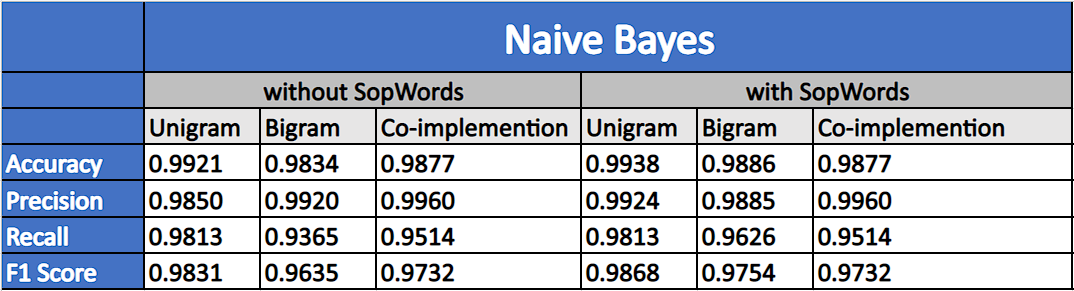

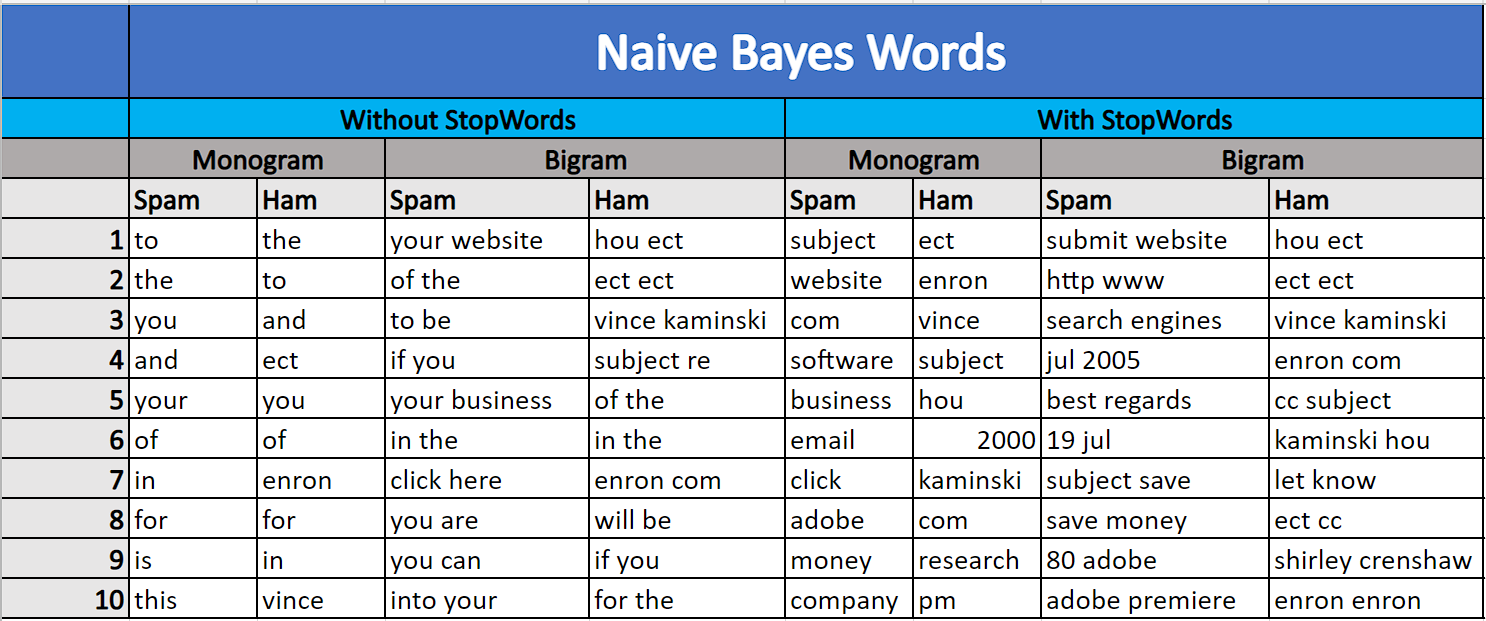

# <font color=red><center>Part 4</center></font>

If we look at the results, we see that the Naive Bayes algorithm classifies the data set correctly to a large extent. We can look at the chart to dig deeper and see the different results for different types of measurement.
Accuracy, precision recall and F1 score values of the Naive Bayes estimations made in the previous sections were measured and tabulated .

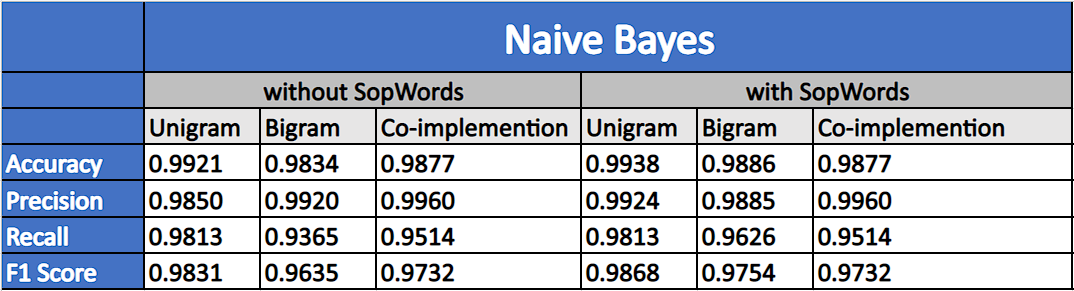

- The unigram is the calculation of the ratio of each word in each sample space separately. Bigram is the calculation of the ratio of sample words in groups of 2. If we compare the Unigram and Bigram values in the Naive Bayes result table, Accuracy is always high in the Unigram section. The main reason for this is data confusion. Just as Overfitting error reduces the correct prediction rates, here too, bigram word groups are too specialized. For this reason, although bigram accuracy is high, it is not as much as unigram. Although there are fluctuations in precision and recall values, F1 Score confirms this.

- By examining the co-implementation part, we observe that the Accuracy value is between unigram and bigram. This shows us that the use of unigram and bigram data together is not very efficient. In addition, calculating these two data groups at the same time gives us a great workload, especially time.

- Considering the results found, it is seen that the accuracy values are high. This shows that the different Navie Bayes algorithm is correct for the dataset. 